In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
heart_data = pd.read_excel(r'heart_disease.xlsx',sheet_name = 'Heart_disease')

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


data type of exang column is mismatched it should be bool not object

In [6]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [7]:
heart_data.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [8]:
print(f'unique values in sex column: {heart_data['sex'].unique()}')
print(f'unique values in cp column: {heart_data['cp'].unique()}')
print(f'unique values in restecg column: {heart_data['restecg'].unique()}')
print(f'unique values in slope column: {heart_data['slope'].unique()}')
print(f'unique values in thal column: {heart_data['thal'].unique()}')
print(f'unique values in num column: {heart_data['num'].unique()}')
print(f'unique values in exang column: {heart_data['exang'].unique()}')

unique values in sex column: ['Male' 'Female']
unique values in cp column: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
unique values in restecg column: ['lv hypertrophy' 'normal' 'st-t abnormality']
unique values in slope column: ['downsloping' 'flat' 'upsloping']
unique values in thal column: ['fixed defect' 'normal' 'reversable defect']
unique values in num column: [0 1 2 3 4]
unique values in exang column: [False True 'FALSE' 'TURE']


Incosistencies found in values of exang column

In [10]:
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

<Axes: >

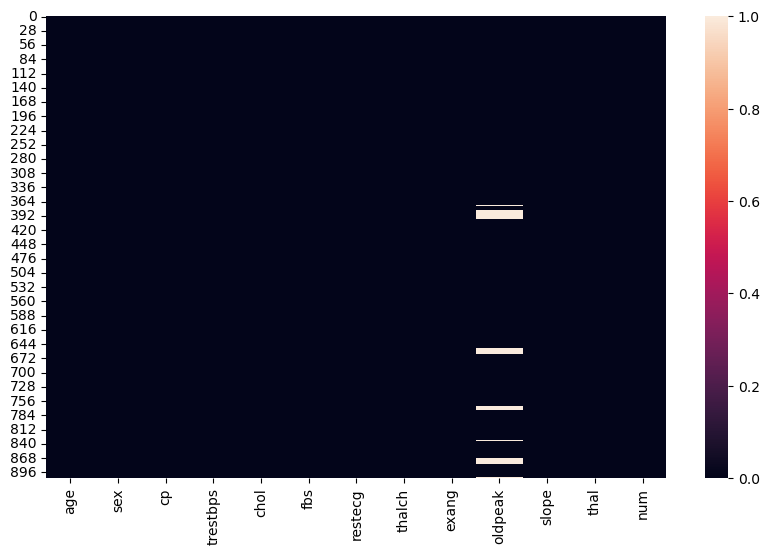

In [11]:
plt.figure(figsize = (10,6))
sns.heatmap(heart_data.isnull())

oldpeak has null values

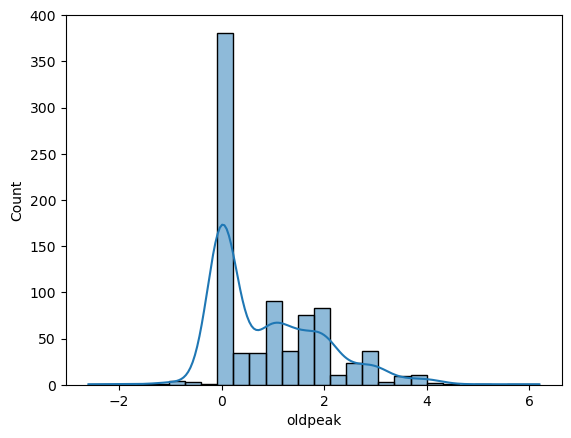

skewness of oldpeak : 1.0217090718797428


In [13]:
sns.histplot(heart_data['oldpeak'],kde = True)
plt.show()
print(f'skewness of oldpeak : {heart_data['oldpeak'].skew()}')

In [14]:
heart_data[heart_data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [16]:
# back
heart_df = heart_data.copy()

In [17]:
# remove duplicate
heart_df = heart_df.drop_duplicates().reset_index(drop = True)

In [18]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.0+ KB


In [19]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
903,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
904,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
905,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [20]:
# correcting inconsistencies in exang columns
heart_df['exang'] = heart_df['exang'].replace({'FALSE':False,'TURE':True})

In [21]:
heart_df['exang'].unique()

array([False,  True])

In [22]:
# correcting data type
heart_df['exang'] = heart_df['exang'].astype(bool)

In [23]:
heart_df['exang'].dtype

dtype('bool')

In [24]:
heart_df.describe

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,845.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.094092,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [25]:
# handling missing values
heart_df['oldpeak'].fillna(heart_df['oldpeak'].mean(), inplace =  True)

In [26]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [27]:
heart_df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,133.412348,201.465270,135.976847,0.892308,1.007718
std,9.162016,20.405432,112.158285,26.813075,1.055993,1.144594
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.500000,120.000000,176.500000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


# Visualizing the distribution of features

<Figure size 1200x800 with 0 Axes>

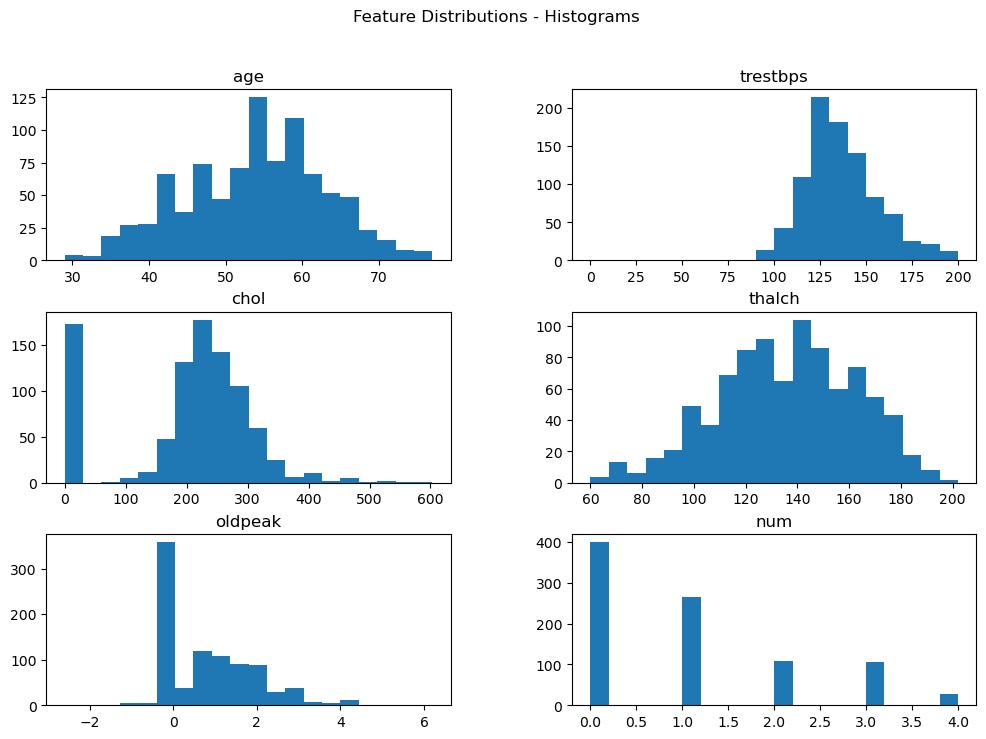

In [66]:
plt.figure(figsize = (12,8))
heart_df.hist(bins = 20, figsize = (12,8),grid = False)
plt.suptitle('Feature Distributions - Histograms')
plt.show()

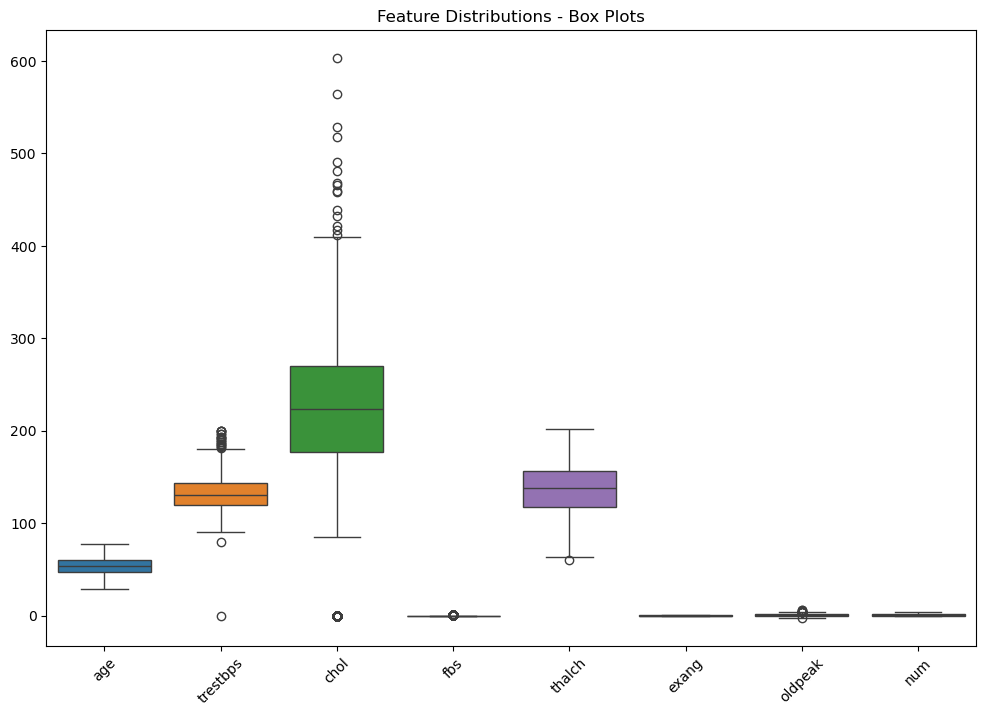

In [71]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=heart_df)
plt.xticks(rotation=45)
plt.title('Feature Distributions - Box Plots')
plt.show()

In [83]:
# Encoding categorical columns
cat_col = heart_df.select_dtypes(exclude = [np.number])
cat_col_df = cat_col.columns.values
cat_col_df

array(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'],
      dtype=object)

Categorical columns are ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [88]:
heart_df = pd.get_dummies(heart_df,columns = cat_col_df, drop_first = True)

In [90]:
heart_df

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.300000,0,True,False,False,True,True,False,False,False,False,False,False,False
1,41,135,203,132,0.000000,0,True,True,False,False,False,True,False,False,True,False,False,False
2,57,140,192,148,0.400000,0,True,False,False,False,False,True,False,False,True,False,False,False
3,52,118,186,190,0.000000,0,True,False,False,True,False,False,False,False,True,False,False,False
4,57,110,201,126,1.500000,0,True,False,False,False,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,125,0,120,1.500000,4,True,False,False,False,False,True,False,False,False,True,False,True
903,62,166,170,120,3.000000,4,True,False,False,False,False,False,True,True,True,False,False,True
904,56,170,0,123,2.500000,4,True,False,True,False,False,False,False,True,False,False,True,False
905,56,144,208,105,0.892308,4,True,False,True,False,True,False,True,True,False,False,False,False


In [94]:
# Correlation Matrix
corr_matrix = heart_df.corr()
corr_matrix

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
age,1.000000,0.253709,-0.100059,-0.327868,0.233303,0.326227,0.051947,-0.184421,-0.021998,0.036915,0.177004,-0.226296,0.133051,0.192202,0.074264,-0.079106,-0.039482,0.064602
trestbps,0.253709,1.000000,0.117392,-0.132841,0.153079,0.136581,0.015988,-0.046811,-0.004716,0.045422,0.112124,-0.118013,0.118234,0.151086,0.062625,-0.027265,-0.075990,0.081504
chol,-0.100059,0.117392,1.000000,0.198074,0.028892,-0.239065,-0.191632,0.146172,0.003334,0.013546,-0.113651,-0.027301,-0.138876,-0.037256,-0.009949,0.040297,0.047378,-0.036892
thalch,-0.327868,-0.132841,0.198074,1.000000,-0.129477,-0.322632,-0.178484,0.220847,0.121594,0.080531,-0.065827,0.041575,-0.180856,-0.348668,-0.220563,0.281344,0.167220,-0.080547
oldpeak,0.233303,0.153079,0.028892,-0.129477,1.000000,0.417748,0.101775,-0.244212,-0.112715,0.039486,0.022336,-0.110560,0.044229,0.371156,0.203016,-0.245271,-0.150501,0.144934
num,0.326227,0.136581,-0.239065,-0.322632,0.417748,1.000000,0.259258,-0.335455,-0.163444,-0.054802,0.156839,-0.165450,0.130134,0.358837,0.164815,-0.195553,-0.212488,0.205019
sex_Male,0.051947,0.015988,-0.191632,-0.178484,0.101775,0.259258,1.000000,-0.171612,-0.069576,0.005324,0.092480,-0.013596,0.070181,0.186884,0.021107,-0.043692,-0.166363,0.136545
cp_atypical angina,-0.184421,-0.046811,0.146172,0.220847,-0.244212,-0.335455,-0.171612,1.000000,-0.252418,-0.107744,-0.075572,0.107236,-0.045921,-0.277009,-0.088077,0.077814,0.040253,-0.070272
cp_non-anginal,-0.021998,-0.004716,0.003334,0.121594,-0.112715,-0.163444,-0.069576,-0.252418,1.000000,-0.122302,-0.034208,0.006971,-0.044321,-0.176974,-0.121305,0.122043,0.097875,-0.065782
cp_typical angina,0.036915,0.045422,0.013546,0.080531,0.039486,-0.054802,0.005324,-0.107744,-0.122302,1.000000,0.022951,-0.060993,-0.010628,-0.118263,-0.004825,0.013134,0.050321,-0.064456


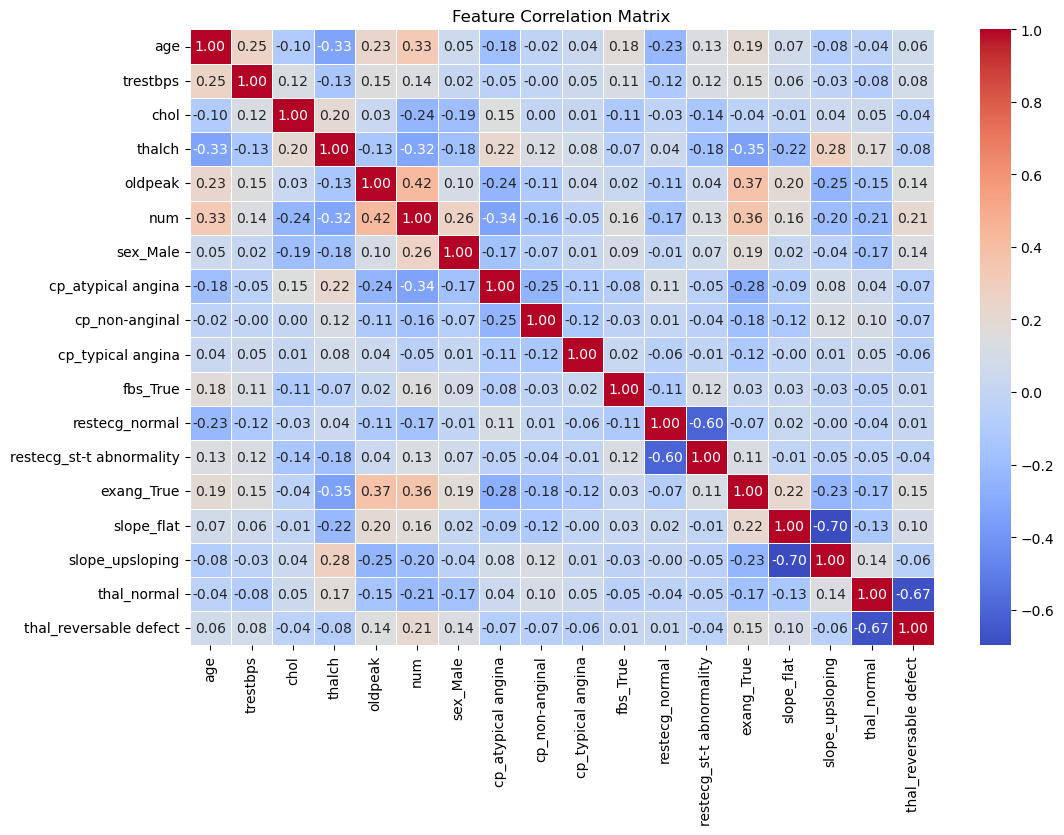

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [116]:
from sklearn.model_selection import train_test_split,GridSearchCV
x = heart_df.drop(columns = ['num'])
y = heart_df['num']

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((725, 17), (182, 17), (725,), (182,))

In [120]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [122]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [169]:
best_clf = grid_search.best_estimator_

In [171]:
y_pred = best_clf.predict(x_test)

In [173]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_clf.predict_proba(x_test), multi_class='ovr')

In [175]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.5275
Precision: 0.4839
Recall: 0.5275
F1-score: 0.5029
ROC-AUC: 0.6922


In [177]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        89
           1       0.40      0.43      0.41        47
           2       0.11      0.05      0.07        20
           3       0.08      0.12      0.10        17
           4       0.00      0.00      0.00         9

    accuracy                           0.53       182
   macro avg       0.27      0.28      0.27       182
weighted avg       0.48      0.53      0.50       182



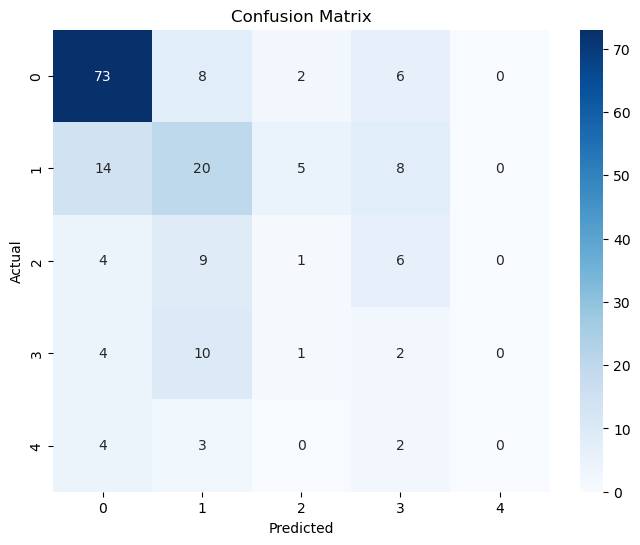

In [179]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the tree

In [181]:
from sklearn.tree import plot_tree

In [183]:
fnames = x.columns
fnames

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_Male',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [185]:
cnames = heart_df['num'].unique()
cnames

array([0, 1, 2, 3, 4], dtype=int64)

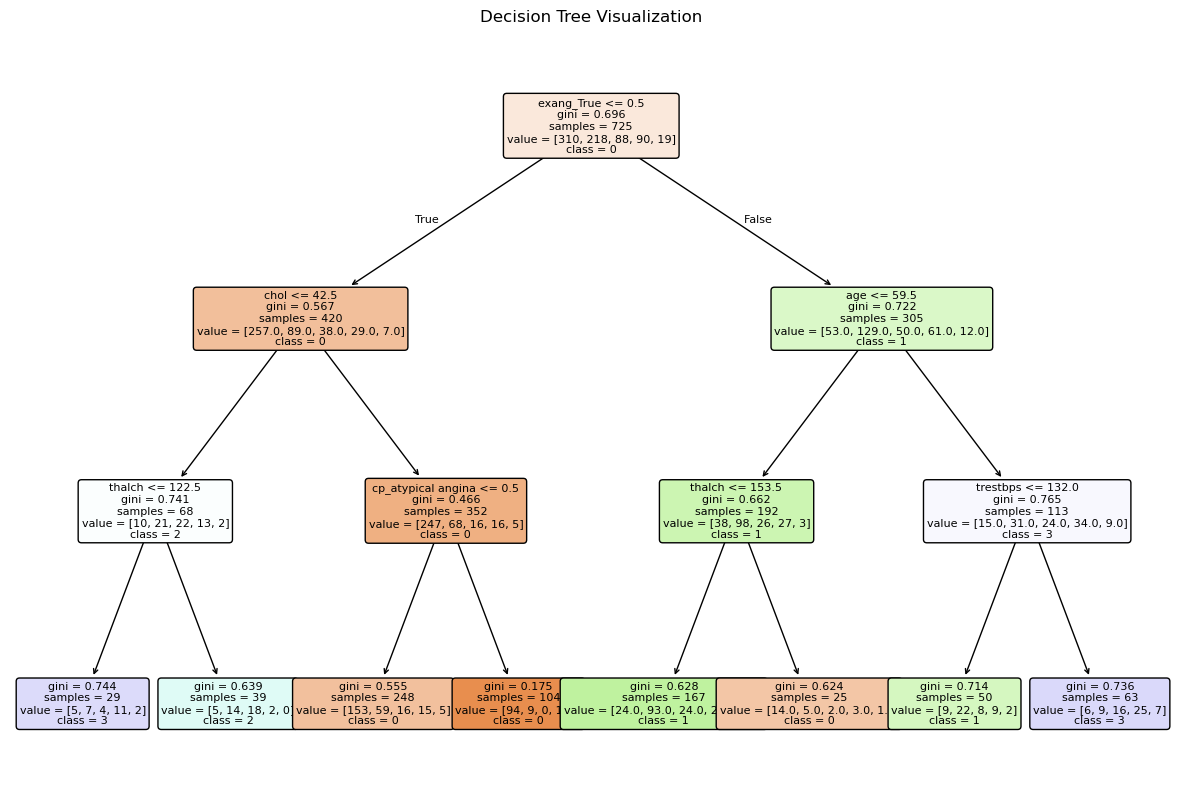

In [189]:
plt.figure(figsize=(15, 10))
plot_tree(best_clf, feature_names=fnames, class_names=[str(cls) for cls in y.unique()], filled=True, rounded=True, fontsize=8)
plt.title('Decision Tree Visualization')
plt.show()